##**Problem Statement**

**Perform sentimental analysis:**

 Extract reviews of any product from ecommerce website like amazon

##**Impoting Libraries**

In [18]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

##**Multi-page web_scraping**

In [19]:

headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

##**Looping through multiple pages**

In [20]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [21]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [22]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

##**Save results to a Dataframe, then export as CSV**

In [23]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice watch,5.0,Perfect Companion for Your Active LifestyleRec...,Reviewed in India on 5 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023
2,5.0 out of 5 stars\nAmazing product,5.0,This is indeed budget friendly item. Thanks Am...,Reviewed in India on 30 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nProduct review.,3.0,All features of the watch are perfect.But when...,Reviewed in India on 7 February 2024
106,5.0 out of 5 stars\nwatch smart Best,5.0,It has very big display and very smooth,Reviewed in India on 18 March 2024
107,5.0 out of 5 stars\nAll,5.0,Product is good,Reviewed in India on 24 March 2024
108,5.0 out of 5 stars\nRefund my payment damage p...,5.0,Refund my payment,Reviewed in India on 25 March 2024


In [24]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [25]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice watch,5.0,Perfect Companion for Your Active LifestyleRec...,5 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nAmazing product,5.0,This is indeed budget friendly item. Thanks Am...,30 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
5,4.0 out of 5 stars\nGood smart watch,4.0,Product looks ravishing and battery as well as...,14 April 2024
6,5.0 out of 5 stars\nNot good for adults,5.0,Ok for kids,13 April 2024
7,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
8,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [26]:
df.to_csv("BoatSmartWatch_Review.csv")

##**Importing dataset**

In [27]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice watch,5.0,Perfect Companion for Your Active LifestyleRec...,5 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nAmazing product,5.0,This is indeed budget friendly item. Thanks Am...,30 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nProduct review.,3.0,All features of the watch are perfect.But when...,7 February 2024
106,5.0 out of 5 stars\nwatch smart Best,5.0,It has very big display and very smooth,18 March 2024
107,5.0 out of 5 stars\nAll,5.0,Product is good,24 March 2024
108,5.0 out of 5 stars\nRefund my payment damage p...,5.0,Refund my payment,25 March 2024


##**Data Exploration**

In [28]:
reviews.Rating.describe()


count    110.000000
mean       4.218182
std        0.708815
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [29]:

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       109 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [30]:
reviews.isna().sum()

Title          0
Rating         0
Review         1
Review_Date    0
dtype: int64

In [31]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice watch,5.0,Perfect Companion for Your Active LifestyleRec...,5 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nAmazing product,5.0,This is indeed budget friendly item. Thanks Am...,30 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022


##**Data Visualization**

**Date vs Review Count**

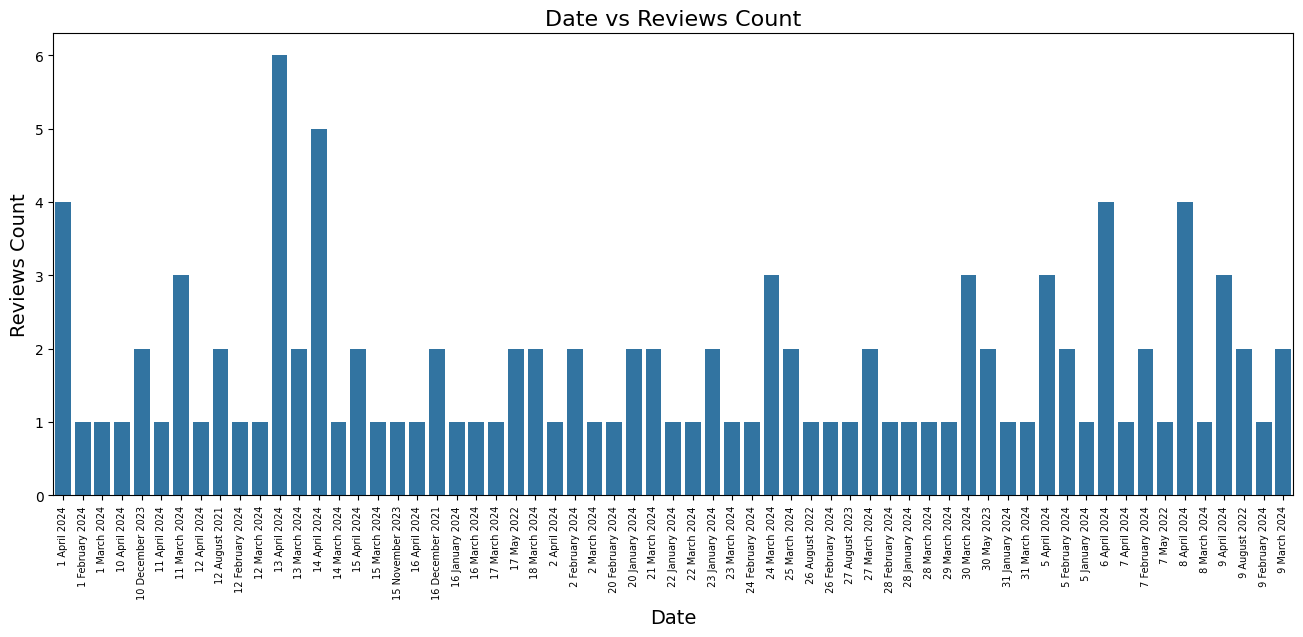

In [32]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()


##**Percentage of Ratings**

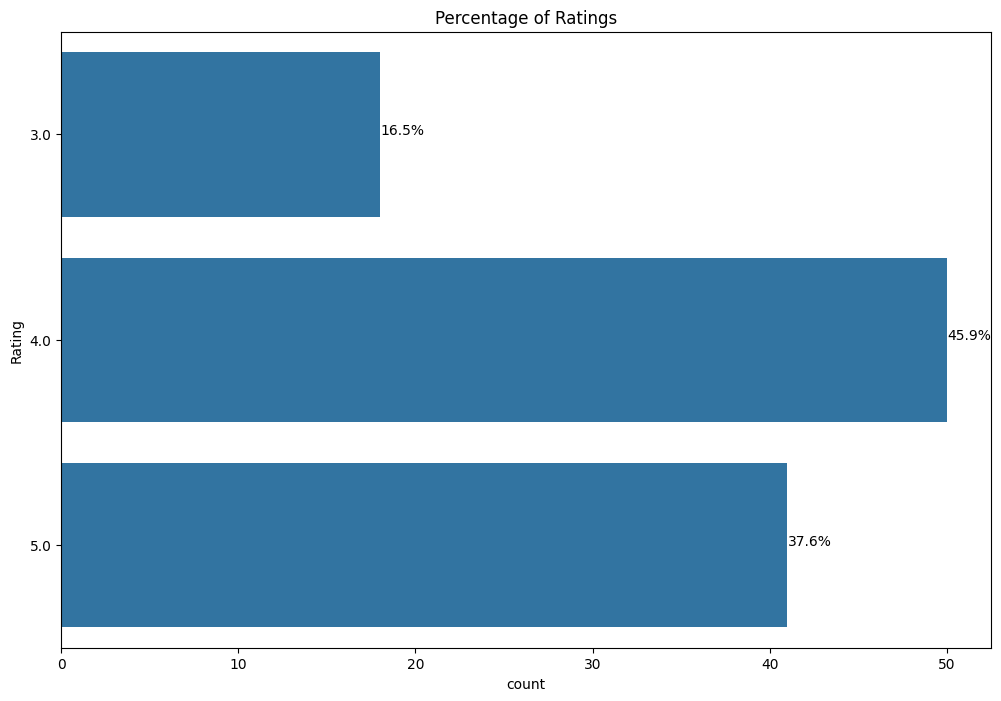

In [33]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

##**BasicText Preprocessing for Sentiment Analysis**
###**Spelling Correction**

In [34]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Perfect Companion for Your Active LifestyleRec...
1    Drawback•Met's know this first, which is not m...
2    His is indeed budget friendly item. Thanks Ama...
3    The media could not be loaded.\n              ...
4    Review OverviewAverage2.The Coat today launche...
Name: Review, dtype: object

In [35]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Perfect Companion for Your Active LifestyleRec...
1,"Drawbacks•Let's know this first, which is not ..."
2,This is indeed budget friendly item. Thanks Am...
3,The media could not be loaded.\n ...
4,Review OverviewAverage2.7The Boat today launch...
...,...
105,All features of the watch are perfect.But when...
106,It has very big display and very smooth
107,Product is good
108,Refund my payment


##**Resetting index**

In [36]:

boat_review.reset_index(drop=True, inplace=True)

In [37]:
!pip install nltk

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
import nltk
nltk.data.find('corpora/stopwords')

FileSystemPathPointer('/root/nltk_data/corpora/stopwords')

In [40]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

##**Lemmatizer**

In [41]:
!pip install nltk
import nltk
nltk.download('wordnet')
try:
  lammatizer=WordNetLemmatizer()
except lookupError as e:
    print(e)
    import nltk
    nltk.download('wordnet')
    lammatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [42]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/109 [00:00<?, ?it/s]

In [43]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


##**Text Pre-processing Techniques**


###**Removing '@names'**

In [44]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [45]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...
6,ok kid,ok kids
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


##**Removing links (http | https)**

In [46]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...
6,ok kid,ok kids
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


##**Removing Review with empty text**

In [47]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...
6,ok kid,ok kids
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


##**Dropping duplicate rows**

In [48]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...
6,ok kid,ok kids
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


##**Function to remove emoji**

In [49]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [50]:

dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...
6,ok kid,ok kids
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


##**Tokenize 'Clean_Reviews'**

In [52]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [53]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['drawback', 'let', 'know', 'first', 'much', 'st', 'delivery', 'late', 'almost', 'month', 'ordering', 'product', 'guess', 'may', 'due', 'great', 'sale', 'offer', 'going', 'time', 'second', 'problem', 'watch', 'battery', 'life', 'mentioned', 'description', 'go', 'day', 'right', 'continue', 'day', 'actually', 'use', 'see', 'time', 'use', 'apps', 'feature', 'much', 'otherwise', 'hardly', 'live', 'day', 'beginning', 'benefitsnow', 'main', 'part', 'st', 'though', 'delivery', 'late', 'good', 'well', 'protected', 'secondly', 'featuresthis', 'boat', 'xtend', 'smartwatch', 'really', 'good', 'handy', 'tech', 'savvy', 'person', 'download', 'boat', 'wave', 'app', 'connect', 'device', 'bluetooth', 'better', 'app', 'set', 'personalize', 'everything', 'app', 'health', 'data', 'almost', 'accurate', 'keep', 'track', 'well', 'well', 'includes', 'step', 'count', 'calorie', 'burn', 'stress', 'level', 'bp', 'oxygen', 'level', 'even', 'menstruation', 'cycle', 'give', 'weekly', 'health', 'report', '

In [54]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [perfect, companion, active, lifestylerecently...
1    [drawback, let, know, first, much, st, deliver...
2     [indeed, budget, friendly, item, thanks, amazon]
3    [medium, could, loaded, used, watch, month, bo...
4    [review, overviewaverage, boat, today, launche...
5    [product, look, ravishing, battery, well, app,...
6                                            [ok, kid]
7    [experience, boat, xtend, call, plus, smart, w...
8    [skipping, part, mostly, covered, review, spon...
9    [pro, premium, build, quality, matte, finishin...
Name: Clean_Reviews, dtype: object

In [55]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...,"[perfect, companion, active, lifestylerecently..."
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!,"[indeed, budget, friendly, item, thanks, amazon]"
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
5,product look ravishing battery well app perfor...,product looks ravishing battery well app perfo...,"[product, look, ravishing, battery, well, app,..."
6,ok kid,ok kids,"[ok, kid]"
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."


##**Converting words to Stemmer**

In [56]:
stemmer = SnowballStemmer("english")

In [57]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,perfect companion activ lifestylerec purchas s...
1,drawback let know first much st deliveri late ...
2,inde budget friend item thank amazon
3,medium could load use watch month bought first...
4,review overviewaverag boat today launch boat x...
...,...
104,featur watch perfect incom call ring silent ma...
105,big display smooth
106,product good
107,refund payment


##**Converting words to Lemma**

In [58]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,perfect companion active lifestylerecently pur...
1,drawback let know first much st delivery late ...
2,indeed budget friendly item thanks amazon
3,medium could loaded used watch month bought fi...
4,review overviewaverage boat today launched boa...
...,...
104,feature watch perfect incoming call ring silen...
105,big display smooth
106,product good
107,refund payment


##**Basic Feature Extaction**

###**Applying bag of Words without N grams**

In [59]:

cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [60]:
print(cv.get_feature_names_out()[109:200])

['big' 'bike' 'bip' 'bit' 'black' 'bloated' 'blood' 'blow' 'bluetooth'
 'boat' 'body' 'bother' 'bought' 'box' 'boyfriend' 'bp' 'bpm' 'brand'
 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings' 'browsing'
 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn'
 'burnt' 'button' 'buy' 'buying' 'cable' 'cache' 'calculated'
 'calculating' 'calculation' 'calculator' 'calender' 'call' 'called'
 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'came' 'camera'
 'cannot' 'carddesign' 'care' 'cart' 'case' 'category' 'catering' 'change'
 'changed' 'changing' 'charge' 'charger' 'charging' 'charm' 'cheap'
 'check' 'checked' 'checking' 'childish' 'chinese' 'choose' 'claim'
 'claimed' 'clarity' 'classic' 'clean' 'clear' 'clearing' 'clearly'
 'click' 'clipuser' 'clone' 'close' 'cloud' 'cm' 'collection']


In [61]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'activation' 'active' 'activites' 'activity' 'actual' 'actually'
 'adapter' 'add' 'added' 'addition' 'adjust' 'advanced' 'advertised'
 'affordable' 'aggregate' 'ago' 'alarm' 'alert' 'alexa' 'alexascreen'
 'allowed' 'allowing' 'almost' 'also' 'alternative' 'aluminium' 'always'
 'amaze' 'amazfit' 'amazing' 'amazon' 'amoled' 'amount' 'analog' 'android'
 'angle' 'animal' 'animation' 'anniversary' 'another' 'answer' 'anything'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'apps' 'appyou'
 'around' 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attached'
 'attaching' 'attention' 'attractive' 'audio' 'auto' 'available' 'average'
 'away' 'awesome' 'back' 'background' 'backup' 'bad' 'badge' 'band' 'bank'
 'ba

In [62]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###**CountVectorizer with N-grams (Bigrams & Trigrams)**

In [63]:
dataframe = dataframe.reset_index(drop=True)

In [64]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [65]:
corpus[3]

'medium could load use watch month bought first sale keep read unbias review tip trick ensur function watch work smoothli larg curv display price categori inch batteri heavi usag frequent wake screen alexa alarm notif day standbi check time occassion day pretti good full charg time hour decent qualiti magnet charg cabl provid use low power adapt power bank laptop necessari health workout track option spo oxymet heart rate monitor accuraci sleep track pretti accur paedomet accur time sometim hundr step ad randomli without activ happen randomli day stress monitor also sure calcul sensor fake probabl watch contact skin display warn messag display data lift wake gestur work second delay manag tap wake function work popular notif whatsapp sm facebook instagram etc read entir sm watch messag unless long call pick silenc see caller id reject call bt music control weather updat alexa usabl smart featur differ watch face avail boat wave app realli good also customis wallpap watch face see post 

##**Applying Countvectorizer (Creating the Bag of Words model)**

In [66]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [67]:
X.shape

(107, 1546)

In [68]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [69]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [70]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,xtend call,xtend call plu,xtend compani,xtend compani latest,xtend design,xtend design buildi,xtend designth,xtend smartwatch,xtend watch,ye
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,2,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,3,1,1,1,3,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1,0,4,3,0,0,1,1,...,0,0,1,1,1,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###**TF-IDF Vectorizer**

In [71]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [72]:
corpus[4]

'review overviewaverag boat today launch boat xtend compani latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembl appl watch moreov built amazon alexa support spo track stress track much come budget segment worth buy smartwatch queri noth worri detail review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfin wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharg clipus manual warranti carddesign build comfortwhen buy smartwatch one alway think design look apart featur design build anoth major aspect one take care buy smartwatch boat work design time bring premium side term look design inspir appl watch cannot compar obvious everi aspect appl watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build qualiti much premium one boat xtend design buildi person like color scheme boat xtend smartwat

###**Applying TF-IDF Vectorizer**

In [73]:

tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [74]:
X.shape

(107, 1546)

In [75]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [76]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [77]:

count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,xtend call,xtend call plu,xtend compani,xtend compani latest,xtend design,xtend design buildi,xtend designth,xtend smartwatch,xtend watch,ye
0,0.210542,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.144323,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.00000,0.000000,0.044897,0.000000,0.00000,0.00000,0.078407,0.057191,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.057191,0.000000,0.000000
2,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.00000,0.029123,0.065025,0.023625,0.02761,0.02761,0.056778,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.027610,0.026374
4,0.000000,0.0,0.01469,0.000000,0.052148,0.042630,0.00000,0.00000,0.011384,0.016607,...,0.0,0.0,0.01869,0.01869,0.01869,0.01869,0.01869,0.116248,0.016607,0.015863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
103,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
104,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
105,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000


##**Named Entity Recognition (NER)**

In [78]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'perfect companion active lifestylerecently purchased smart watch absolutely thrilledwith purchase design sleek modern thebattery life amazing drawback let know first much st delivery late almost month ordering product guess may due great sale offer going time second problem watch battery life mentioned description go day right continue day actually use see time use apps feature much otherwise hardly live day beginning benefitsnow main part st though delivery late good well protected secondly featuresthis boat xtend smartwatch really good handy tech savvy person download boat wave app connect device bluetooth better app set personalize everything app health data almost accurate keep track well well includes step count calorie burn stress level bp oxygen level even menstruation cycle give weekly health report breath training feature also available need kind sport activity including cycling swimming hiking rowing cricket etc available found phone flashlight weather forecast music feature

##**Parts Of Speech (POS) Tagging**

In [79]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [80]:
for token in doc_block[:50]:
    print(token,token.pos_)

perfect ADJ
companion NOUN
active ADJ
lifestylerecently ADV
purchased VERB
smart ADJ
watch NOUN
absolutely ADV
thrilledwith ADP
purchase NOUN
design NOUN
sleek ADJ
modern ADJ
thebattery NOUN
life NOUN
amazing ADJ
drawback NOUN
let AUX
know VERB
first ADV
much ADV
st PROPN
delivery NOUN
late ADV
almost ADV
month NOUN
ordering VERB
product NOUN
guess NOUN
may AUX
due VERB
great ADJ
sale NOUN
offer NOUN
going VERB
time NOUN
second ADJ
problem NOUN
watch VERB
battery NOUN
life NOUN
mentioned VERB
description NOUN
go VERB
day NOUN
right INTJ
continue VERB
day NOUN
actually ADV
use VERB


##**Filtering the nouns and verbs only**

In [81]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['gesture', 'hand', 'pressing', 'side', 'knob', 'activate', 'get', 'watch', 'calculating', 'math', 'problem', 'translating', 'word', 'language', 'finding', 'quote', 'explore', 'amaze', 'watch', 'face', 'use', 'picture', 'liking', 'budget', 'item', 'thanks', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 'day', 'charging', 'time', 'hour', 'quality', 'charging', 'cable', 'provided', 'use', 'power', 'laptop', 'health', 'workout', 'tracking', 'option', 'spo', 'accuracy', 'sleep', 'tracking', 'paedometer', 'time', 'step', 'added', 'activity', 'happens', 'day', 'stress', 'monitor', 'calculated', 'sensor', 'watch', 'contact', 'skin', 'display', 'warning', 'message', 'display', 'data', 'lift', 'wake', 'gesture', 'work', 'delay', 'tap', 'wake', 'functionality', 'work']


##**Counting the noun & verb tokens**

In [82]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,199
1,boat,93
2,feature,78
3,time,69
4,smartwatch,55
5,day,53
6,app,49
7,display,49
8,xtend,48
9,battery,45


##**Visualizing results (Barchart for top 10 nouns + verbs)**

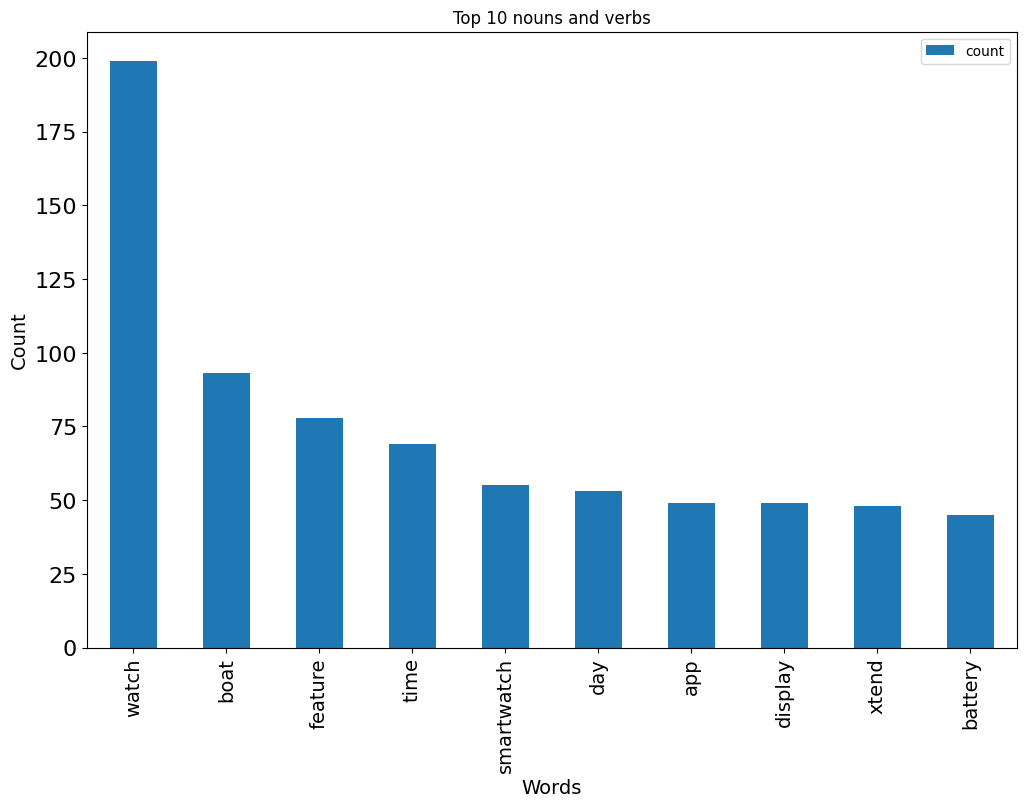

In [83]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

##**Feature Extraction**


####**BOW Features**

In [84]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

####**TF-IDF Features**

In [85]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

##**Fetch sentiments Using TextBlob**

In [86]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [87]:

sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,102
neg,5


##**Let's calculate subjectivity and Polarity**

In [88]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...,"[perfect, companion, active, lifestylerecently...",0.723810,0.346825
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!,"[indeed, budget, friendly, item, thanks, amazon]",0.350000,0.287500
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171


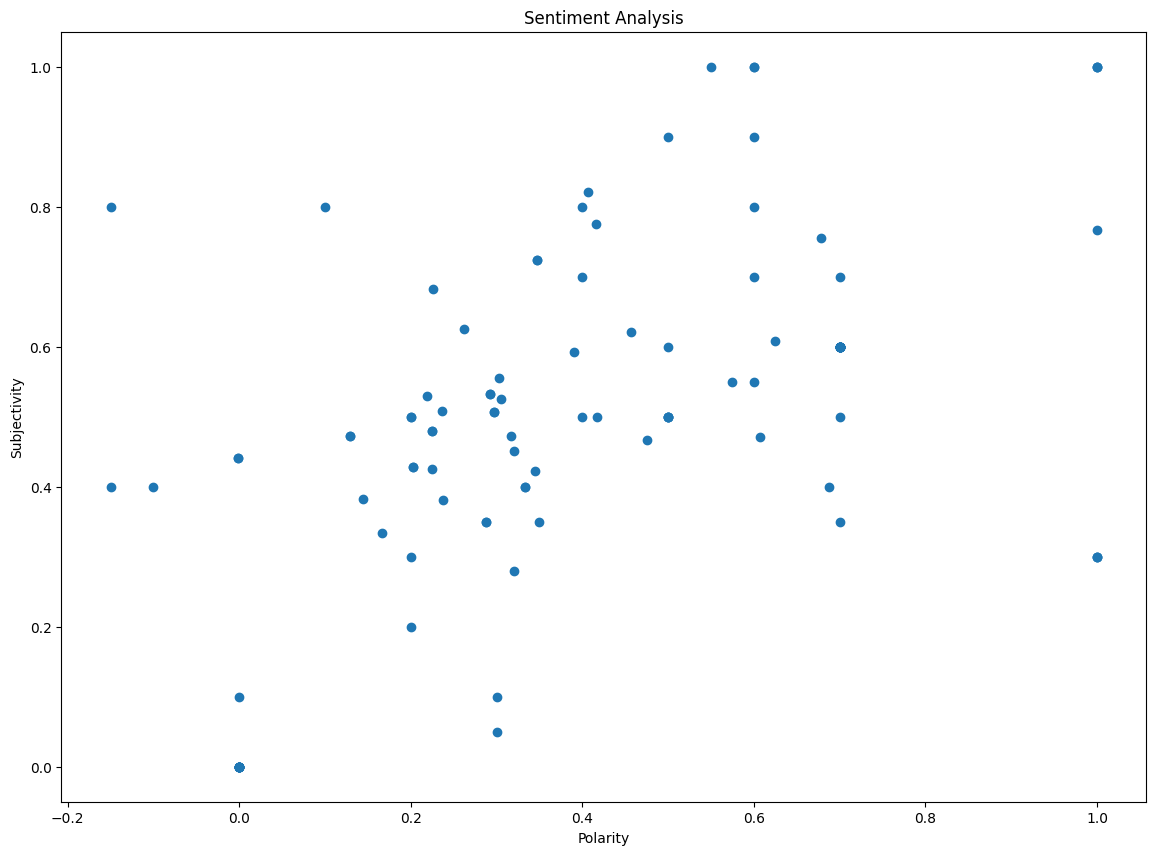

In [89]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');


In [90]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,perfect companion active lifestylerecently pur...,perfect companion your active lifestylerecentl...,"[perfect, companion, active, lifestylerecently...",0.723810,0.346825,pos
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569,pos
2,indeed budget friendly item thanks amazon,this indeed budget friendly item. thanks amazon!,"[indeed, budget, friendly, item, thanks, amazon]",0.350000,0.287500,pos
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos


##**Story Generation and Visualization**

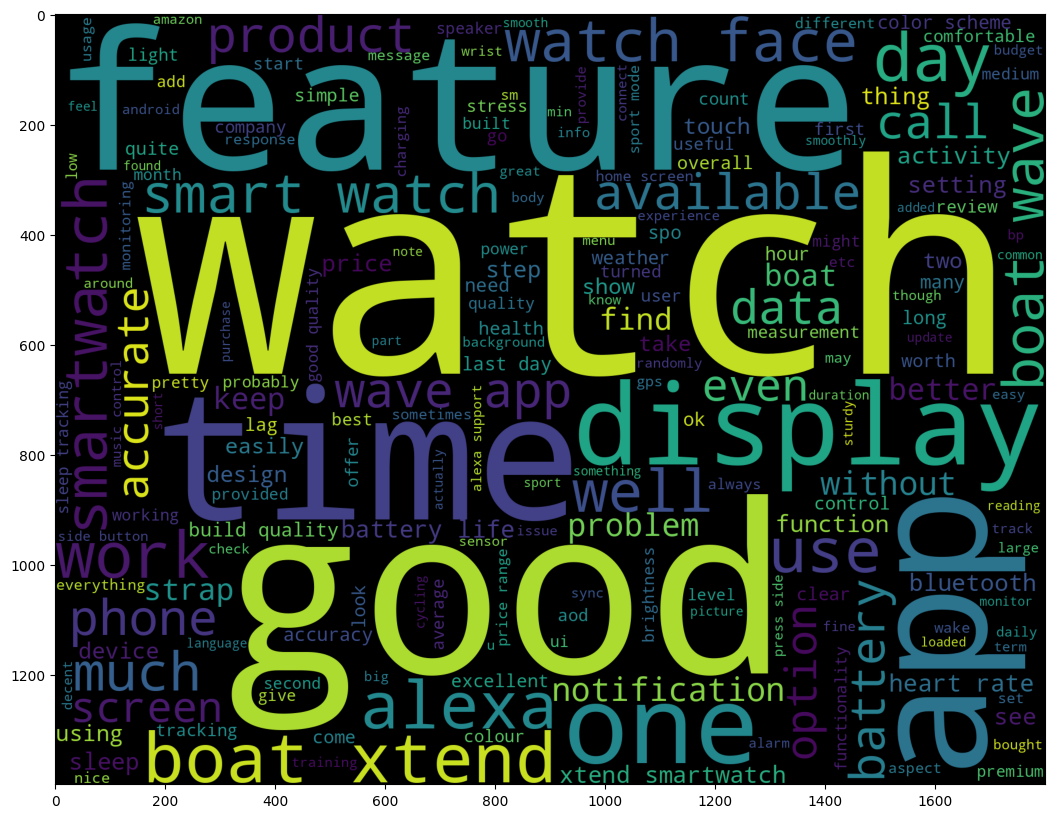

In [91]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

##**Most common words in positive Review**

In [92]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

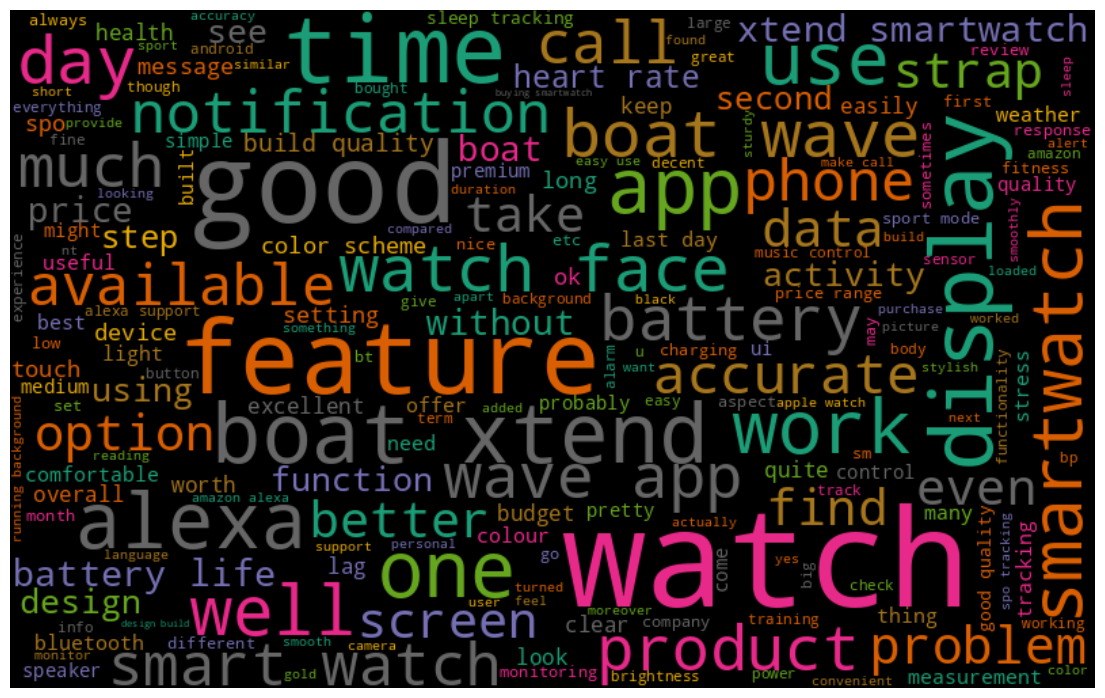

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

###**Most common words in negative Review**

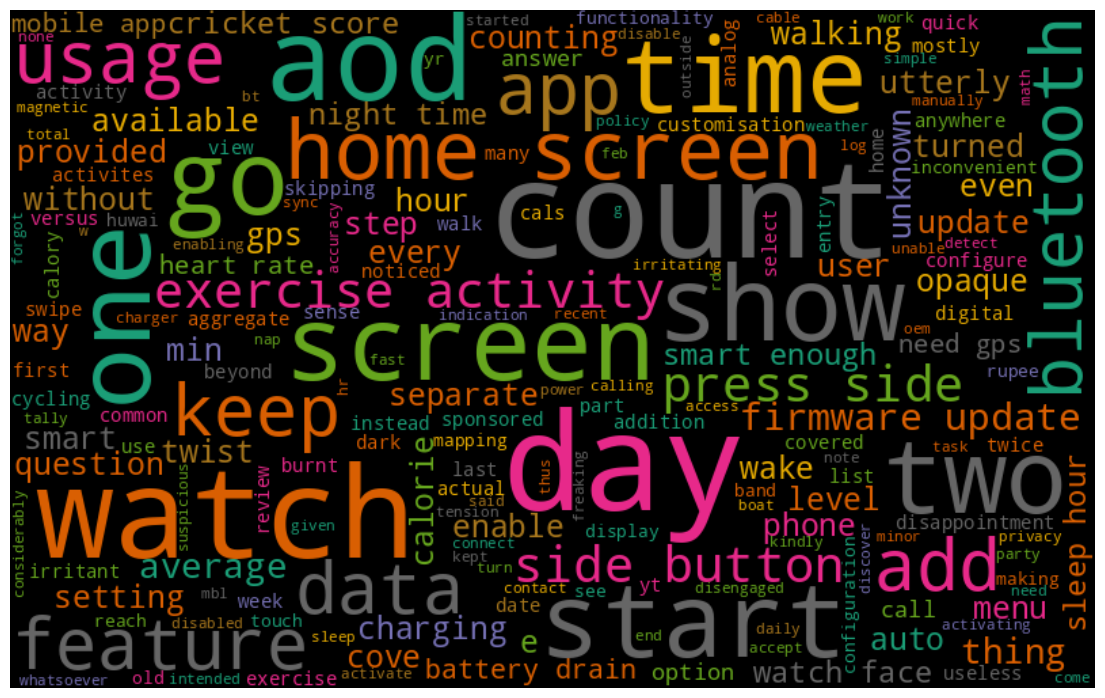

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)